In [31]:
import pandas as pd

dataset = pd.read_csv('../csv/dataset_original.csv')

nonum_feats_names = ['BREED', 'GENDER_01', 'Taglia', 'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'CUPRETROVERSION', 'RECTUSFEMORISM.RELEASE', 'LUX_01', 'LUX_CR']
num_cols_names = ['AGEATSURGERYmo', 'BODYWEIGHTKG', 'BCS', 'ALO', 'STEMANTEVERSIONREAL']

nonum_feats = dataset[nonum_feats_names].astype('category')
ohc_feats = pd.get_dummies(nonum_feats,drop_first=True)
ohc_feats.rename(columns={'LUX_01_1': 'LUX_01'}, inplace=True)

data = pd.concat([dataset[num_cols_names], ohc_feats.drop('LUX_01', axis=1)],axis=1)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, classification_report, mean_squared_error
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import warnings
import numpy as np

In [33]:
final_df = pd.concat([dataset[num_cols_names], ohc_feats],axis=1)
final_df

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_01,LUX_CR_1
0,56.500000,31.6,5.0,46.0,17.7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.400000,40.9,5.0,40.0,27.7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15.133333,35.0,5.0,42.0,27.7,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,83.433333,18.7,6.0,40.0,24.2,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,7.533333,36.4,4.0,42.0,25.9,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,57.433333,25.0,5.0,43.0,27.7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3193,49.233333,38.0,6.0,48.0,25.9,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
3194,38.033333,43.0,5.0,48.0,11.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3195,11.533333,28.0,5.0,52.0,31.3,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True


In [34]:
X_pos = final_df[final_df['LUX_01'] == True].drop(columns=['LUX_01'])
X_pos

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_33,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_CR_1
3056,8.830000,30.0,6.0,43.0,20.8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3057,14.000000,24.8,4.0,38.0,22.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3058,11.100000,32.2,5.0,45.0,22.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3059,10.000000,31.8,5.0,40.0,24.2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3060,7.770000,25.5,4.0,45.0,20.8,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,57.433333,25.0,5.0,43.0,27.7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3193,49.233333,38.0,6.0,48.0,25.9,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3194,38.033333,43.0,5.0,48.0,11.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3195,11.533333,28.0,5.0,52.0,31.3,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
def plot_mse_neural(data, layer_sizes, n_iter):
    X_pos = data[data['LUX_01'] == True].drop(columns=['LUX_01']).values
    #X_neg = data[data['Mezzo'] == 1].drop(columns=['Mezzo']).values
    
    fig, axs = plt.subplots(4, 2, figsize=(20, 15))

    for idx, (layer_size) in enumerate(layer_sizes):
        hidden_layer_sizes = (layer_size,) 
        mse_values = []
        
        for n_max_iter in range(1, n_iter+1):
            with warnings.catch_warnings():
                scaler = StandardScaler()
                X_pos = scaler.fit_transform(X_pos)
                
                mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=n_max_iter, random_state=42, solver='sgd', warm_start=True)
                mlp.fit(X_pos, X_pos)

                X_pred = mlp.predict(X_pos)

                X_pos = scaler.inverse_transform(X_pos)
                X_pred = scaler.inverse_transform(X_pred)

                mse = mean_squared_error(X_pos, X_pred)
                mse_values.append(mse)

        axs[int(idx / 2), idx % 2].plot(range(1, n_iter+1), mse_values, marker='o')
        axs[int(idx / 2), idx % 2].set_title('MSE vs. Number of Iterations (' + str(layer_size) + ' size)')
        axs[int(idx / 2), idx % 2].set_xlabel('Number of Iterations')
        axs[int(idx / 2), idx % 2].set_ylabel('Mean Squared Error')

    plt.tight_layout()     
    plt.show()

In [36]:
#plot_mse_neural(final_df, np.arange(90, 54, -5), n_iter=115)

In [37]:
final_df

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_01,LUX_CR_1
0,56.500000,31.6,5.0,46.0,17.7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9.400000,40.9,5.0,40.0,27.7,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15.133333,35.0,5.0,42.0,27.7,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,83.433333,18.7,6.0,40.0,24.2,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,7.533333,36.4,4.0,42.0,25.9,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,57.433333,25.0,5.0,43.0,27.7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3193,49.233333,38.0,6.0,48.0,25.9,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
3194,38.033333,43.0,5.0,48.0,11.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3195,11.533333,28.0,5.0,52.0,31.3,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True


In [38]:
# Sostituisce True con 1 e False con 0 solo nelle colonne di tipo bool
final_df = final_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
final_df

/tmp/ipykernel_59563/2164674804.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_01,LUX_CR_1
0,56.500000,31.6,5.0,46.0,17.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.400000,40.9,5.0,40.0,27.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.133333,35.0,5.0,42.0,27.7,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,83.433333,18.7,6.0,40.0,24.2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7.533333,36.4,4.0,42.0,25.9,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,57.433333,25.0,5.0,43.0,27.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3193,49.233333,38.0,6.0,48.0,25.9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3194,38.033333,43.0,5.0,48.0,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3195,11.533333,28.0,5.0,52.0,31.3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [39]:
def get_strategy_oversampling(n_negativi, rapporto):
    """
    Calcola il numero di esempi positivi per il sovracampionamento.

    Args:
        n_negativi (int): Il numero di esempi negativi.
        rapporto (float): Il rapporto desiderato tra esempi positivi e negativi.

    Returns:
        n_positivi: Il numero di esempi positivi da generare.
    """
    n_positivi = (1 / rapporto * n_negativi) - n_negativi
    return int(n_positivi)

In [40]:
def encoder(df, random_seed=42):
    """
    Applica il sovracampionamento tramite MLPRegressor per riequilibrare le classi nel dataset.

    Args:
        df (pd.DataFrame): Il dataset originale.
        oversampling_ratio (float): Il rapporto di sovracampionamento desiderato.
        random_seed (int): Il seme per la riproducibilità.

    Returns:
        pd.DataFrame: Il dataset riequilibrato.
    """
    positive_class = df[df['LUX_01'] == 1]
    negative_class = df[df['LUX_01'] == 0]

    X_pos = positive_class.drop(columns=['LUX_01'])
    y_pos = positive_class['LUX_01']

    scaler = StandardScaler()
    X_pos_scaled = scaler.fit_transform(X_pos)

    input_dim = X_pos_scaled.shape[1]
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(64, 32, 16), max_iter=115, random_state=random_seed, solver='sgd', warm_start=True)
    mlp_regressor.fit(X_pos_scaled, X_pos_scaled)

    num_new_samples = get_strategy_oversampling(len(negative_class), 2/3) - len(positive_class)
    new_samples_input = np.random.rand(num_new_samples, input_dim)
    new_samples_scaled = mlp_regressor.predict(new_samples_input)
    new_samples = scaler.inverse_transform(new_samples_scaled)

    new_positive_class = pd.DataFrame(new_samples, columns=X_pos.columns)
    new_positive_class['LUX_01'] = 1

    '''# Seleziona le colonne di tipo object
    object_columns = new_positive_class.select_dtypes(include=['object']).columns
    
    # Converti i valori in numeri e arrotonda al numero intero più vicino, sostituendo i NaN con 0
    for col in object_columns:
        new_positive_class[col] = pd.to_numeric(new_positive_class[col], errors='coerce').round().fillna(0).astype(int)'''

    y_test = new_positive_class.drop(['LUX_01'], axis=1).sample(n=141, random_state=42)
    mse = mean_squared_error(X_pos, y_test)

    dataset = pd.concat([df, new_positive_class], ignore_index=True)
    dataset = dataset.sample(frac=1, random_state=random_seed).reset_index(drop=True)

    return dataset, mse

In [41]:
final_df.dtypes

AGEATSURGERYmo              float64
BODYWEIGHTKG                float64
BCS                         float64
ALO                         float64
STEMANTEVERSIONREAL         float64
                             ...   
CUPRETROVERSION_40            int64
RECTUSFEMORISM.RELEASE_1      int64
RECTUSFEMORISM.RELEASE_2      int64
LUX_01                        int64
LUX_CR_1                      int64
Length: 125, dtype: object

In [42]:
dataset = dataset.drop(['first_lux_days_after_thr', 'DIRECTION', 'n_luxation'], axis=1)
data, mse = encoder(final_df)
print(mse)

9.614230429836022


/home/biso/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
data['LUX_01'].value_counts()

LUX_01
0    3056
1    1528
Name: count, dtype: int64

In [44]:
final_df

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_01,LUX_CR_1
0,56.500000,31.6,5.0,46.0,17.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.400000,40.9,5.0,40.0,27.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.133333,35.0,5.0,42.0,27.7,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,83.433333,18.7,6.0,40.0,24.2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7.533333,36.4,4.0,42.0,25.9,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,57.433333,25.0,5.0,43.0,27.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3193,49.233333,38.0,6.0,48.0,25.9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3194,38.033333,43.0,5.0,48.0,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3195,11.533333,28.0,5.0,52.0,31.3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [45]:
data

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_01,LUX_CR_1
0,34.033333,50.000000,6.000000,45.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
1,24.106761,33.323477,5.190385,43.815246,26.854683,0.052401,0.186629,0.001489,0.151851,0.005184,...,0.134728,0.016773,0.007208,-0.237717,-0.081171,0.040449,0.072846,0.121408,1,0.364507
2,20.866667,18.500000,5.000000,40.000000,22.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
3,71.500000,19.500000,5.000000,45.000000,24.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,25.364301,32.684045,5.106435,43.667276,27.819105,0.042630,0.180305,0.010285,0.138115,0.003559,...,0.075901,0.023848,-0.000656,-0.184103,-0.028456,0.032359,0.060079,0.107618,1,0.379879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,25.325174,33.124206,5.202153,43.777005,27.459759,0.053256,0.180817,-0.009749,0.128215,0.003681,...,0.105500,0.012080,0.006859,-0.242067,-0.061110,0.084856,0.068810,0.127426,1,0.370953
4580,8.400000,24.300000,5.000000,43.000000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4581,80.570000,43.000000,7.000000,43.000000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
4582,24.829728,32.881459,5.160298,43.684142,27.500574,0.051868,0.182477,0.007586,0.138640,0.002948,...,0.089810,0.016343,0.005607,-0.212571,-0.062703,0.060875,0.063514,0.118989,1,0.361999


In [46]:
# Funzione per arrotondare le colonne di tipo object
def round_object_columns(df):
    # Seleziona le colonne di tipo object
    object_columns = df.select_dtypes(include=['object']).columns
    
    # Converti i valori in numeri e arrotonda al numero intero più vicino, sostituendo i NaN con 0
    for col in object_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').round().fillna(0).astype(int)
    
    return df

# Applica la funzione al DataFrame
data = round_object_columns(data)
data

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_01,LUX_CR_1
0,34.033333,50.000000,6.000000,45.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
1,24.106761,33.323477,5.190385,43.815246,26.854683,0.052401,0.186629,0.001489,0.151851,0.005184,...,0.134728,0.016773,0.007208,-0.237717,-0.081171,0.040449,0.072846,0.121408,1,0.364507
2,20.866667,18.500000,5.000000,40.000000,22.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
3,71.500000,19.500000,5.000000,45.000000,24.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,25.364301,32.684045,5.106435,43.667276,27.819105,0.042630,0.180305,0.010285,0.138115,0.003559,...,0.075901,0.023848,-0.000656,-0.184103,-0.028456,0.032359,0.060079,0.107618,1,0.379879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,25.325174,33.124206,5.202153,43.777005,27.459759,0.053256,0.180817,-0.009749,0.128215,0.003681,...,0.105500,0.012080,0.006859,-0.242067,-0.061110,0.084856,0.068810,0.127426,1,0.370953
4580,8.400000,24.300000,5.000000,43.000000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4581,80.570000,43.000000,7.000000,43.000000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
4582,24.829728,32.881459,5.160298,43.684142,27.500574,0.051868,0.182477,0.007586,0.138640,0.002948,...,0.089810,0.016343,0.005607,-0.212571,-0.062703,0.060875,0.063514,0.118989,1,0.361999


In [47]:
final_df.dtypes

AGEATSURGERYmo              float64
BODYWEIGHTKG                float64
BCS                         float64
ALO                         float64
STEMANTEVERSIONREAL         float64
                             ...   
CUPRETROVERSION_40            int64
RECTUSFEMORISM.RELEASE_1      int64
RECTUSFEMORISM.RELEASE_2      int64
LUX_01                        int64
LUX_CR_1                      int64
Length: 125, dtype: object

In [50]:
def train_test(dataset, df, random):
    """
    Suddivide il dataset in set di addestramento e di test.

    Args:
        dataset (pd.DataFrame): Il dataset originale.
        df (pd.DataFrame): Il dataset su cui effettuare la suddivisione.
        random (bool): Se True, la suddivisione è casuale; altrimenti, viene utilizzato un seme fisso.

    Returns:
        tuple: Un tuple contenente il set di addestramento e il set di test.
    """
    if random:
        y_test_0 = dataset[dataset['LUX_01']==0].sample(n=200)
        y_test_1 = dataset[dataset['LUX_01']==1].sample(n=100)
    else:
        y_test_0 = dataset[dataset['LUX_01']==0].sample(n=200, random_state=42)
        y_test_1 = dataset[dataset['LUX_01']==1].sample(n=100, random_state=42)

    
    lista_dataframe = [y_test_0, y_test_1]
    testing_set = pd.concat(lista_dataframe, ignore_index=True)

    merged_df = df.merge(testing_set, on=df.columns.tolist(), how='inner', indicator=True)
    righe_comuni = merged_df[merged_df['_merge'] == 'both'].drop(columns='_merge')

    merged_df = df.merge(righe_comuni, on=df.columns.tolist(), how='left', indicator=True)
    training_set = merged_df[merged_df['_merge'] == 'left_only'].drop(columns='_merge')

    return training_set, testing_set

In [51]:
training_set, testing_set = train_test(final_df, data, False)

/tmp/ipykernel_59563/2073755814.py:24: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = df.merge(testing_set, on=df.columns.tolist(), how='inner', indicator=True)


In [52]:
X_train = training_set.drop(['LUX_01'], axis=1)
y_train = training_set['LUX_01']

X_test = testing_set.drop(['LUX_01'], axis=1)
y_test = testing_set['LUX_01']

In [53]:
import sys
sys.path.append("../base_lib")
import models 

In [54]:
data

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_01,LUX_CR_1
0,34.033333,50.000000,6.000000,45.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
1,24.106761,33.323477,5.190385,43.815246,26.854683,0.052401,0.186629,0.001489,0.151851,0.005184,...,0.134728,0.016773,0.007208,-0.237717,-0.081171,0.040449,0.072846,0.121408,1,0.364507
2,20.866667,18.500000,5.000000,40.000000,22.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
3,71.500000,19.500000,5.000000,45.000000,24.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,25.364301,32.684045,5.106435,43.667276,27.819105,0.042630,0.180305,0.010285,0.138115,0.003559,...,0.075901,0.023848,-0.000656,-0.184103,-0.028456,0.032359,0.060079,0.107618,1,0.379879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,25.325174,33.124206,5.202153,43.777005,27.459759,0.053256,0.180817,-0.009749,0.128215,0.003681,...,0.105500,0.012080,0.006859,-0.242067,-0.061110,0.084856,0.068810,0.127426,1,0.370953
4580,8.400000,24.300000,5.000000,43.000000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
4581,80.570000,43.000000,7.000000,43.000000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
4582,24.829728,32.881459,5.160298,43.684142,27.500574,0.051868,0.182477,0.007586,0.138640,0.002948,...,0.089810,0.016343,0.005607,-0.212571,-0.062703,0.060875,0.063514,0.118989,1,0.361999


In [55]:
X_train

,AGEATSURGERYmo,BODYWEIGHTKG,BCS,ALO,STEMANTEVERSIONREAL,BREED_2,BREED_3,BREED_4,BREED_5,BREED_6,...,CUPRETROVERSION_33,CUPRETROVERSION_34,CUPRETROVERSION_35,CUPRETROVERSION_36,CUPRETROVERSION_37,CUPRETROVERSION_38,CUPRETROVERSION_40,RECTUSFEMORISM.RELEASE_1,RECTUSFEMORISM.RELEASE_2,LUX_CR_1
1,24.106761,33.323477,5.190385,43.815246,26.854683,0.052401,0.186629,0.001489,0.151851,0.005184,...,0.025050,0.134728,0.016773,0.007208,-0.237717,-0.081171,0.040449,0.072846,0.121408,0.364507
2,20.866667,18.500000,5.000000,40.000000,22.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,71.500000,19.500000,5.000000,45.000000,24.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25.364301,32.684045,5.106435,43.667276,27.819105,0.042630,0.180305,0.010285,0.138115,0.003559,...,0.061352,0.075901,0.023848,-0.000656,-0.184103,-0.028456,0.032359,0.060079,0.107618,0.379879
5,8.366667,27.400000,5.000000,44.000000,22.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4578,26.759888,32.378222,5.133140,43.621686,28.720809,0.043264,0.161895,-0.000106,0.111238,0.010202,...,0.051652,0.086330,0.020541,0.001543,-0.130811,-0.039386,0.110790,0.059857,0.103780,0.371216
4579,25.325174,33.124206,5.202153,43.777005,27.459759,0.053256,0.180817,-0.009749,0.128215,0.003681,...,0.018861,0.105500,0.012080,0.006859,-0.242067,-0.061110,0.084856,0.068810,0.127426,0.370953
4580,8.400000,24.300000,5.000000,43.000000,17.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4582,24.829728,32.881459,5.160298,43.684142,27.500574,0.051868,0.182477,0.007586,0.138640,0.002948,...,0.025320,0.089810,0.016343,0.005607,-0.212571,-0.062703,0.060875,0.063514,0.118989,0.361999


In [56]:
y_train.value_counts()

LUX_01
0    2856
1    1428
Name: count, dtype: int64

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier(random_state=42, 
                               max_depth=8,
                               min_samples_split=4,
                               min_impurity_decrease=0.0,
                               criterion='gini')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)
precision = precision_score(y_test, predictions, average='macro', zero_division=1)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
roc_auc = roc_auc_score(y_test, predictions)

print("accuracy = ", accuracy)
print("recall = ", recall)
print("precision = ", precision)
print("f1 = ", f1)
print("roc-auc = ", roc_auc)

accuracy =  0.6766666666666666
recall =  0.515
precision =  0.8367003367003367
f1 =  0.4315407005137622
roc-auc =  0.515


In [58]:
import sys
sys.path.append("../base_lib")
import models

In [59]:
model = models.decision_tree_model(X_train, X_test, y_train, y_test, max_depth=8, min_sample_split=4, min_impurity_decrease=0.0, criterion='gini')
model.statistics(X_test, y_test)

,Metrica,Valore
0,Accuracy,0.676667
1,Recall - Sensibilità,0.515000
2,Precision - Specificità,0.836700
3,F1-score,0.431541
4,ROC AUC,0.515000


,criterion,max_depth,min_impurity_decrease,min_samples_split,n_estimators
0,gini,8,0.0,2,3


,Metrica,Valore
0,Accuracy,0.666667
1,Recall - Sensibilità,0.500000
2,Precision - Specificità,0.833333
3,F1-score,0.400000
4,ROC AUC,0.500000


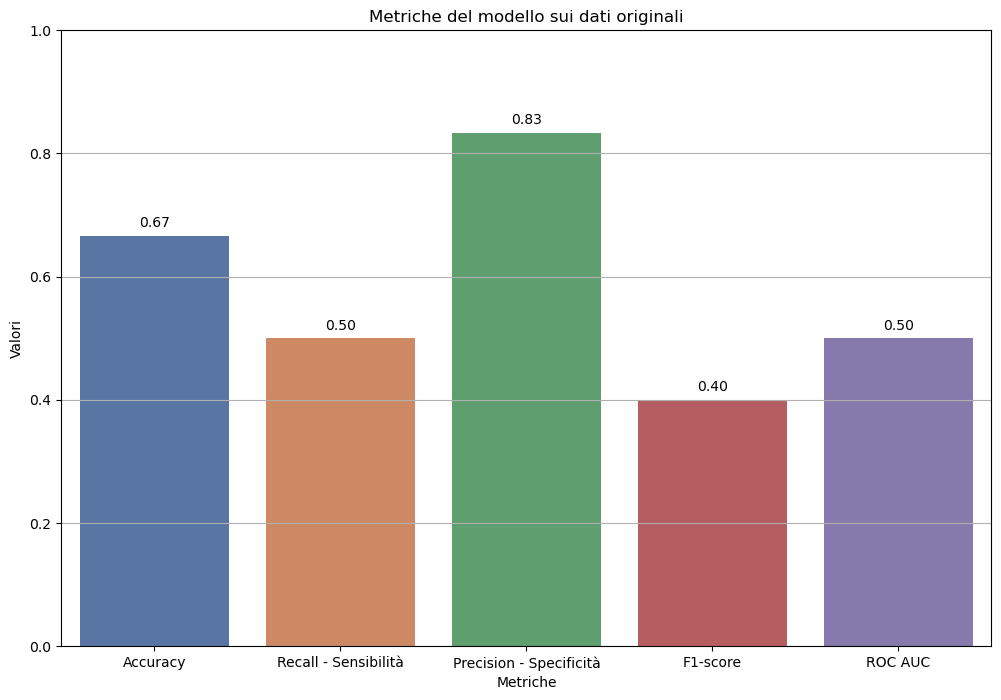

IndexError: list index out of range

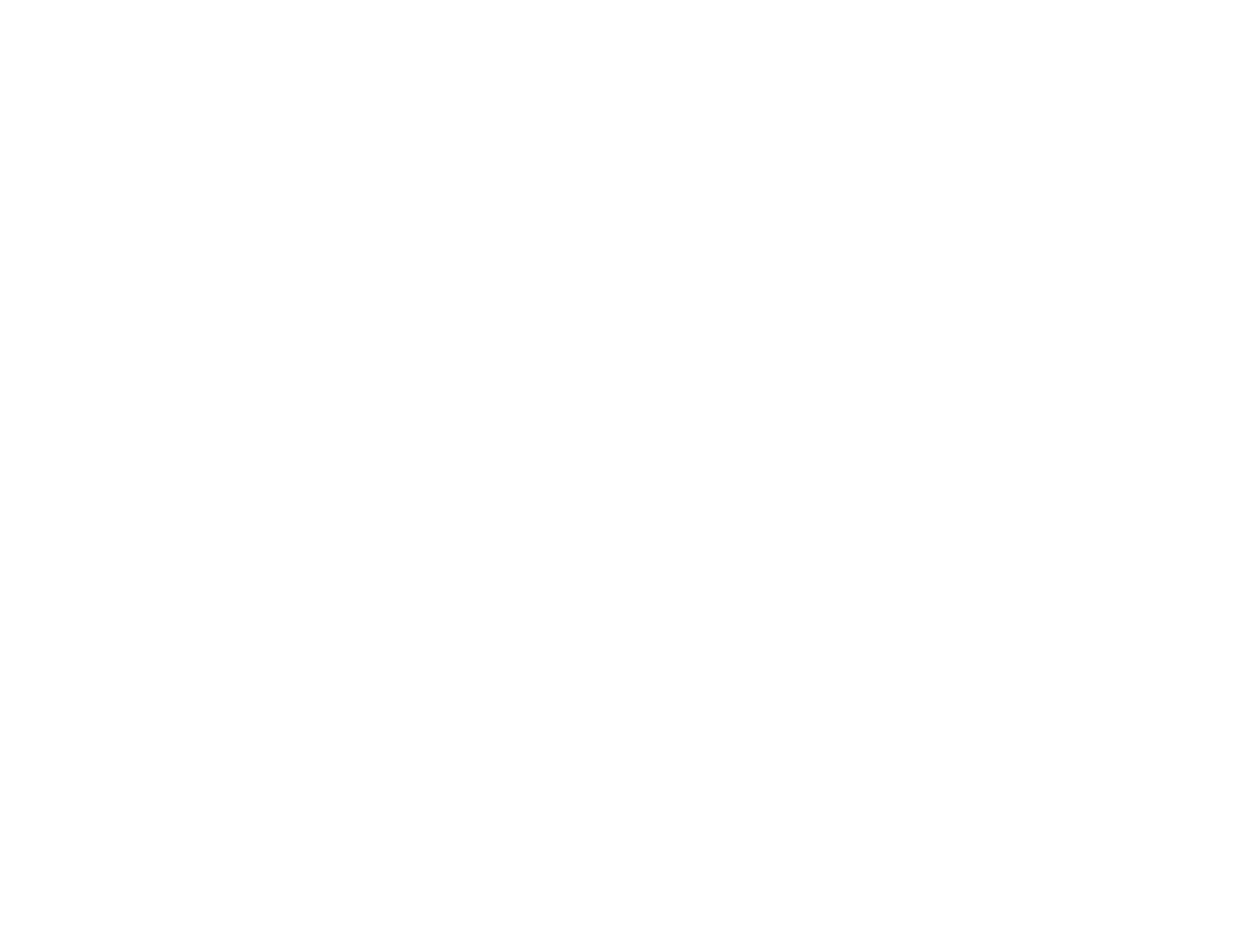

In [60]:
param_grid = {
        'n_estimators': [3, 4, 5],
        'max_depth': [8],
        'criterion': ["gini", "entropy"],
        'min_samples_split': [2, 4, 6],
        'min_impurity_decrease': [0.0, 0.01, 0.02]
    }

rf, metrics_df, results = models.random_forest_gridsearchcv_model(X_train, X_test, y_train, y_test, param_grid, 5, 'f1_macro')